# Soccer Data
This dataset contains data of every game from the 2018-2019 season in the English Premier League. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [25]:
import pandas as pd

pd.read_csv("soccer18-19.csv")

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0


## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What team commits the most fouls?
- 📊 **Visualize**: Plot the percentage of games that ended in a draw over time.
- 🔎 **Analyze**: Does the number of red cards a team receives have an effect on its probability of winning a game?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired as a data analyst for a local soccer team. The team has recently signed on some junior players and wants to give them as much experience as possible without losing games. If the head coach could be confident in the outcome of a game by halftime, they would be more likely to give the junior players time on the field.

The coach has asked you whether you can predict the outcome of a game by the results at halftime and how confident you would be in the prediction. 

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

🗺️ **Explore**: What team commits the most fouls?

In [26]:
# Load the dataset
df = pd.read_csv("soccer18-19.csv")

# Group the data by team and sum the fouls committed
# HF	Number of fouls made by home team
# AF	Number of fouls made by away team
fouls_by_team = df.groupby('HomeTeam')['HF'].sum() + df.groupby('AwayTeam')['AF'].sum()

# Get the team with the most fouls
team_with_most_fouls = fouls_by_team.idxmax()

# Print the team with the most fouls
print ("The team which commits the most fouls was " + team_with_most_fouls)

The team which commits the most fouls was Brighton


🎯**Answer:** The team which commits the most fouls was Brighton

📊 **Visualize**: Plot the percentage of games that ended in a draw over time.

([<matplotlib.patches.Wedge at 0x7f5f281afbb0>,
 [Text(0.9158777319973632, 0.6092355702282708, 'Draw'),
  Text(-0.9158778175584803, -0.6092354416022719, 'No-draw')],
 [Text(0.4995696719985617, 0.33231031103360226, '18.7%'),
  Text(-0.49956971866826194, -0.3323102408739665, '81.3%')])

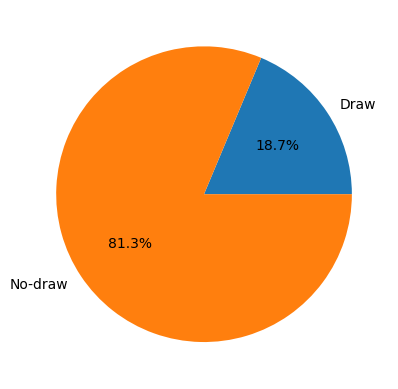

In [27]:
import matplotlib.pyplot as plt

# Calculate the percentage of games that ended in a draw over time
# FTR	Full time result
draw_percentages = df[df['FTR'] == 'D'].count()['FTR'] / df.count()['FTR']*100

labels = 'Draw', 'No-draw'
sizes = [draw_percentages, (100-draw_percentages)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

🔎 **Analyze:** Does the number of red cards a team receives have an effect on its probability of winning a game?

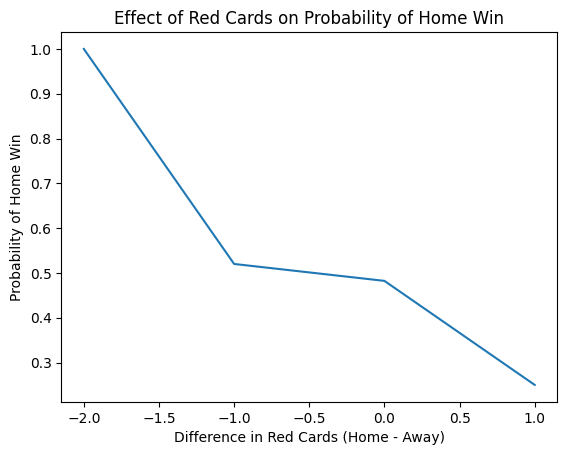

In [28]:
# Create a new column with the difference in red cards between home and away teams
# HR	Number of red cards received by home team
# AR	Number of red cards received by away team
df['RedDiff'] = df['HR'] - df['AR']

# Create a new column indicating whether the home team won or not
# FTR	Full time result
df['HomeWin'] = df['FTR'].apply(lambda x: 1 if x == 'H' else 0)

# Group the data by the difference in red cards and calculate the mean of home wins
red_diff_home_win = df.groupby('RedDiff')['HomeWin'].mean()

# Plot the results
plt.plot(red_diff_home_win.index, red_diff_home_win.values)
plt.xlabel('Difference in Red Cards (Home - Away)')
plt.ylabel('Probability of Home Win')
plt.title('Effect of Red Cards on Probability of Home Win')
plt.show()